In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from datetime import datetime, date
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.metrics import *

2024-10-03 17:22:42.788928: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-03 17:22:42.793121: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-03 17:22:42.807726: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-03 17:22:42.831960: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-03 17:22:42.839243: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-03 17:22:44.172421: W tensorflow/compiler/tf2tensorrt/utils/p

In [2]:
data = pd.read_csv('/home/hoangbaoan1901/Development/predictive-analysis/Homeworks/week-3-btl/datasets/jrfm-2156907-cleaned.csv')

In [3]:
data = data.drop(columns=['Date'])


In [4]:
data.head()

,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume,Active Addr Cnt,Xfer Cnt,Mean Tx Size (native units),Total Fees (USD),Mean Hash Rate,...,RUB,Tweets,Google,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,278.740997,280.391998,276.365997,279.584991,42484800.0,283150,497302,2.057514,7235.134845,356031.3023,...,64.480003,47467,90.000000,0,0,0,0,1,0,0
1,279.742004,279.928009,260.709991,260.997009,58533000.0,266587,284532,3.675623,5806.842316,420413.4050,...,64.480003,29031,91.578947,0,0,0,0,0,1,0
2,261.115997,267.002991,260.467987,265.083008,23789600.0,262571,276720,4.201519,4952.554125,372000.7193,...,64.480003,27132,91.578947,0,0,0,0,0,0,1
3,265.477997,267.032013,262.596008,264.470001,20979400.0,292834,304538,3.463212,7563.840456,437493.8037,...,64.480003,27744,96.315789,1,0,0,0,0,0,0
4,264.342010,270.385986,264.093994,270.385986,25433900.0,271613,280398,3.785274,7128.842169,424395.1868,...,62.889999,26653,104.210526,0,1,0,0,0,0,0


In [5]:
data.shape

(2430, 47)

In [6]:
data.isna().sum()

BTC_Open                       0
BTC_High                       0
BTC_Low                        0
BTC_Close                      0
BTC_Volume                     0
Active Addr Cnt                0
Xfer Cnt                       0
Mean Tx Size (native units)    0
Total Fees (USD)               0
Mean Hash Rate                 0
Difficulty                     0
Mean Block Size (in bytes)     0
Sum Block Weight               0
LTC                            0
XRP                            0
DASH                           0
DOGE                           0
ETH                            0
Gold                           0
Silver                         0
Copper                         0
Oil                            0
Treasury Yield 10 Years        0
S&P500                         0
DJI                            0
CBOE                           0
NASDAQ                         0
JP225                          0
CSI300                         0
DXY                            0
EUR       

In [7]:
# Divide into train set and test set
train_size = int(len(data) * 0.8)
train_set = data.iloc[:train_size]
test_set = data.iloc[train_size:]

In [8]:
# Define the target variable
target = 'BTC_Close'

# Create the feature sets
X_train = train_set.drop(columns=[target])
X_test = test_set.drop(columns=[target])

# Create the target sets
Y_train = train_set[target]
Y_test = test_set[target]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

ts = 1

# Create sequences with a time step of 2
def create_sequences(data, target, time_step=ts):
	X, y = [], []
	for i in range(len(data) - time_step):
		X.append(data[i:(i + time_step)])
		y.append(target[i + time_step])
	return np.array(X), np.array(y)

X_train, Y_train = create_sequences(X_train.values, Y_train.values)
X_test, Y_test = create_sequences(X_test.values, Y_test.values)

print("X_train shape after sequencing:", X_train.shape)
print("X_test shape after sequencing:", X_test.shape)
print("Y_train shape after sequencing:", Y_train.shape)
print("Y_test shape after sequencing:", Y_test.shape)


# Normalize the datasets using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Update the variables used for training
X_train = X_train_scaled
X_test = X_test_scaled

print(X_train) 

X_train shape: (1944, 46)
X_test shape: (486, 46)
Y_train shape: (1944,)
Y_test shape: (486,)
X_train shape after sequencing: (1943, 1, 46)
X_test shape after sequencing: (485, 1, 46)
Y_train shape after sequencing: (1943,)
Y_test shape after sequencing: (485,)
[[[0.00356452 0.00272224 0.00409059 ... 1.         0.         0.        ]]

 [[0.00361647 0.00269888 0.0032567  ... 0.         1.         0.        ]]

 [[0.00264968 0.00204816 0.00324381 ... 0.         0.         1.        ]]

 ...

 [[0.87735389 0.88747437 0.89009328 ... 0.         1.         0.        ]]

 [[0.9088451  0.90910737 0.92463288 ... 0.         0.         1.        ]]

 [[0.93265356 0.98289574 0.957614   ... 0.         0.         0.        ]]]


In [9]:
model = tf.keras.Sequential([
	tf.keras.layers.LSTM(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
	tf.keras.layers.Dropout(0.2),
	tf.keras.layers.LSTM(128, activation='relu', return_sequences=True),
	tf.keras.layers.Dropout(0.3),
	tf.keras.layers.LSTM(256, activation='relu', return_sequences=True),
	tf.keras.layers.Dropout(0.4),
	tf.keras.layers.LSTM(256, activation='relu', return_sequences=False),
	tf.keras.layers.Dropout(0.5),
	tf.keras.layers.Dense(1)
])

I0000 00:00:1727950966.451399   85165 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-03 17:22:46.474515: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/hoangbaoan1901/Development/predictive-analysis/Homeworks/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model 

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fit the model
history = model.fit(X_train, Y_train, epochs=30)

Epoch 1/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 47084576.0000 - mae: 5369.2808
Epoch 2/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6348133.0000 - mae: 2056.5598
Epoch 3/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2180871.2500 - mae: 1173.1625
Epoch 4/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2004147.8750 - mae: 946.1394
Epoch 5/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1963729.6250 - mae: 900.9477
Epoch 6/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1526051.3750 - mae: 805.2390
Epoch 7/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1614853.6250 - mae: 821.3469
Epoch 8/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1602945.6250 - mae: 840.4772
Epoch 9/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1572282.7500 - mae: 776.1628
Epoch 10/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1373045.7500 - mae: 767.6747
Epoch 11/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1323962.6250 - mae: 737.8588
Epoch 12/30
61/61 ━━━━━━━━

In [11]:
# Use the model to make predictions on the test set
predictions = model.predict(X_test)

# Print the predictions
print(predictions)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
[[17315.895]
 [17868.21 ]
 [17550.443]
 [17370.303]
 [17808.035]
 [17680.102]
 [17370.31 ]
 [16752.652]
 [16689.537]
 [16296.026]
 [16720.242]
 [17618.326]
 [17399.852]
 [17678.367]
 [19565.635]
 [21279.85 ]
 [21215.992]
 [21702.648]
 [22291.54 ]
 [21337.451]
 [20950.902]
 [21399.49 ]
 [21013.64 ]
 [21735.852]
 [23416.46 ]
 [25550.256]
 [24663.129]
 [24766.676]
 [26217.664]
 [26738.047]
 [26386.953]
 [29532.621]
 [32481.824]
 [29874.324]
 [30310.984]
 [33236.383]
 [36878.43 ]
 [37898.08 ]
 [38547.098]
 [37692.12 ]
 [34306.945]
 [33121.742]
 [32938.168]
 [36467.523]
 [35214.625]
 [34355.34 ]
 [33431.68 ]
 [33774.67 ]
 [34743.125]
 [33152.25 ]
 [31669.348]
 [29507.457]
 [30581.395]
 [30370.834]
 [31130.555]
 [30190.076]
 [29182.729]
 [29688.852]
 [34244.215]
 [31991.664]
 [31424.54 ]
 [31228.176]
 [32497.988]
 [34426.47 ]
 [35332.203]
 [35616.605]
 [37389.242]
 [36724.383]
 [40929.086]
 [45309.25 ]
 [43859.637]
 [43690.066]
 [45620.18 ]
 [45351.008

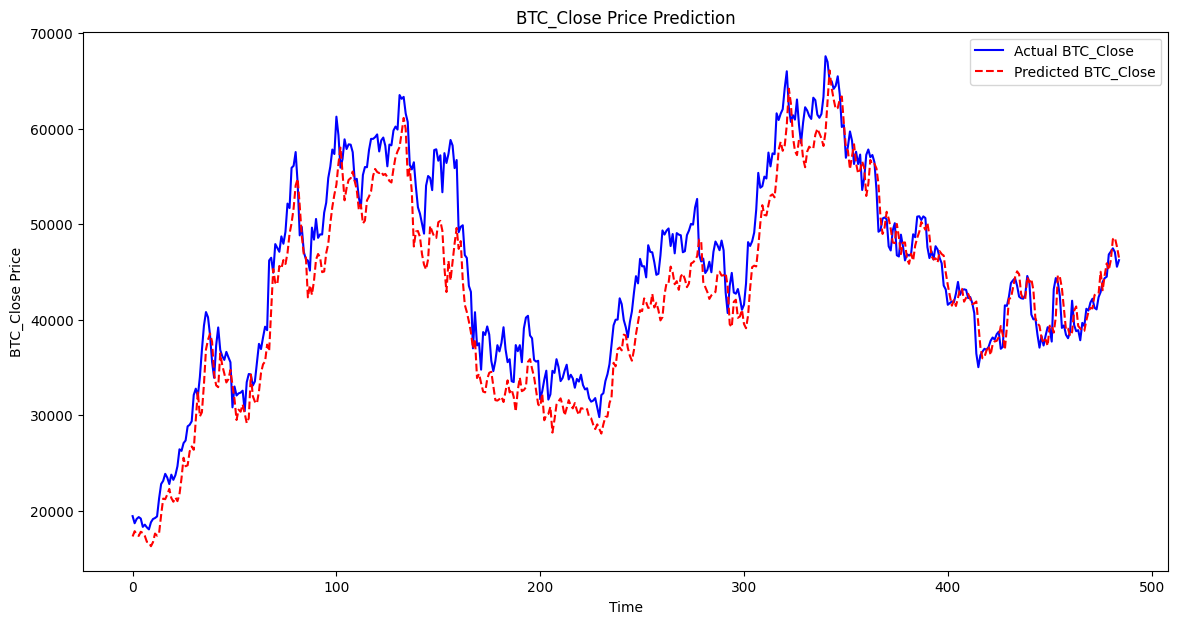

In [12]:
# Plot the predictions against the actual values
plt.figure(figsize=(14, 7))
plt.plot(Y_test, color='blue', label='Actual BTC_Close')
plt.plot(predictions, color='red', label='Predicted BTC_Close', linestyle='dashed')
plt.title('BTC_Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC_Close Price')
plt.legend()
plt.show()